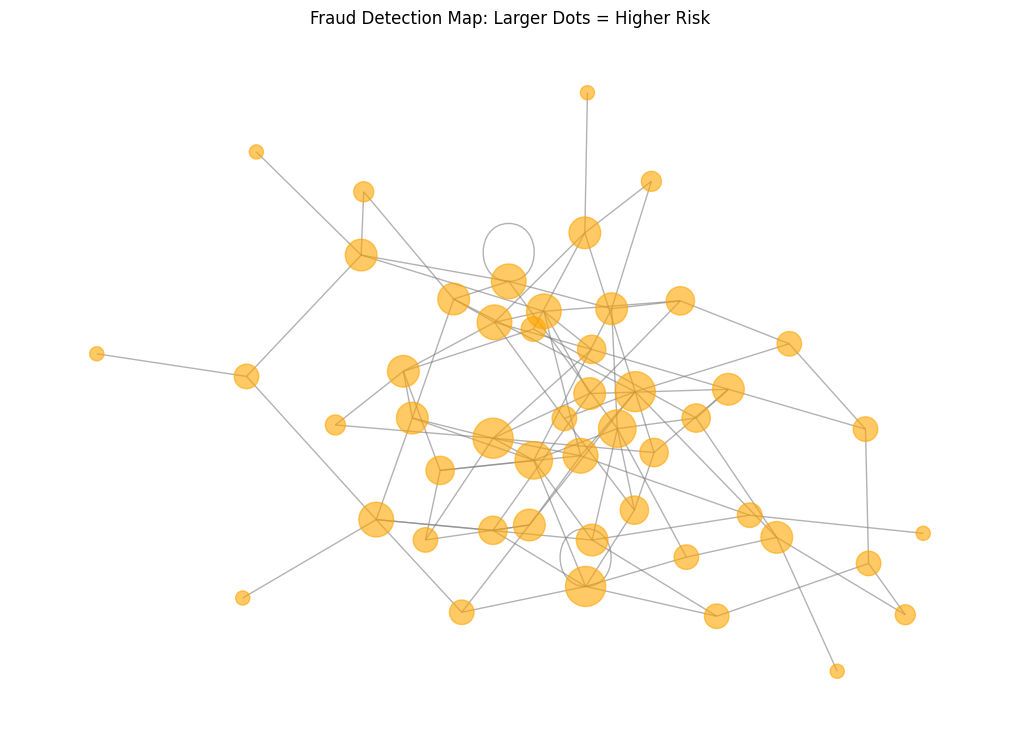

--- TOP 5 SUSPICIOUS ACCOUNTS (RED FLAGS) ---
   Account_ID  Fraud_Score
0      Acc_41     0.166667
5      Acc_18     0.166667
10     Acc_15     0.166667
38     Acc_11     0.145833
17     Acc_35     0.145833


In [1]:
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt

# 1. CREATE LARGE DATASET (The fix is in the 'for i' part below)
random.seed(42)
accounts = [f"Acc_{i}" for i in range(1, 51)] # Added 'for' here
data = {
    'sender': [random.choice(accounts) for _ in range(100)],
    'receiver': [random.choice(accounts) for _ in range(100)],
    'amount': [random.randint(10, 5000) for _ in range(100)]
}
df = pd.DataFrame(data)

# 2. THE ANALYST'S WORK: GRAPH MATH
G = nx.from_pandas_edgelist(df, 'sender', 'receiver')

# Calculate 'Degree Centrality' (Fraud Risk Score)
centrality = nx.degree_centrality(G)

# 3. CREATE THE FRAUD REPORT
report = pd.DataFrame({
    'Account_ID': list(centrality.keys()),
    'Fraud_Score': list(centrality.values())
})

# Sort by highest score to find the suspects
suspicious_accounts = report.sort_values(by='Fraud_Score', ascending=False).head(5)

# 4. VISUALIZE (Making the 'Bad Guys' bigger)
plt.figure(figsize=(10,7))
node_sizes = [v * 5000 for v in centrality.values()]
nx.draw(G, with_labels=False, node_size=node_sizes, node_color='orange', edge_color='gray', alpha=0.6)
plt.title("Fraud Detection Map: Larger Dots = Higher Risk")
plt.show()

print("--- TOP 5 SUSPICIOUS ACCOUNTS (RED FLAGS) ---")
print(suspicious_accounts)

In [2]:
# Create a 'Status' column based on the score
report['Status'] = report['Fraud_Score'].apply(lambda x: '🚨 HIGH RISK' if x > 0.15 else 'Normal')

# Filter to see only the high-risk individuals
flagged_accounts = report[report['Status'] == '🚨 HIGH RISK']

print("DATA ANALYST INVESTIGATION REPORT:")
print(f"Total Accounts Scanned: {len(report)}")
print(f"Suspicious Activities Found: {len(flagged_accounts)}")
print("-" * 30)
print(flagged_accounts)

DATA ANALYST INVESTIGATION REPORT:
Total Accounts Scanned: 49
Suspicious Activities Found: 3
------------------------------
   Account_ID  Fraud_Score       Status
0      Acc_41     0.166667  🚨 HIGH RISK
5      Acc_18     0.166667  🚨 HIGH RISK
10     Acc_15     0.166667  🚨 HIGH RISK


In [3]:
# This saves your findings to a file you can download
report.to_csv('fraud_investigation_results.csv', index=False)
print("Project exported! Look at the folder icon on the left of your screen to download 'fraud_investigation_results.csv'.")

Project exported! Look at the folder icon on the left of your screen to download 'fraud_investigation_results.csv'.


In [4]:
from google.colab import files

# This tells the browser to download the file immediately
files.download('fraud_investigation_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>